In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="5" color="red">ch12.데이터 시각화_1절 Matplotlib</font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리, 판다스 내부에 포함
    * seaborn : matplotlib기반으로 다양한 색, 테마, 챠트 가능과 groupby 기능 포함된 라이브러리
# 1절. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/index

In [4]:
import matplotlib
matplotlib.__version__

'3.7.0'

## 1.1 패키지 import 및 기본 설정

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format= 'retina'
# 한글성정

# warnimg(경고) 안보이게

#


## 1.2 그래프 그리기
- matplotlib 으로 그래프 그리기 위한 준비
    1. 데이터 준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프출력 및 저장

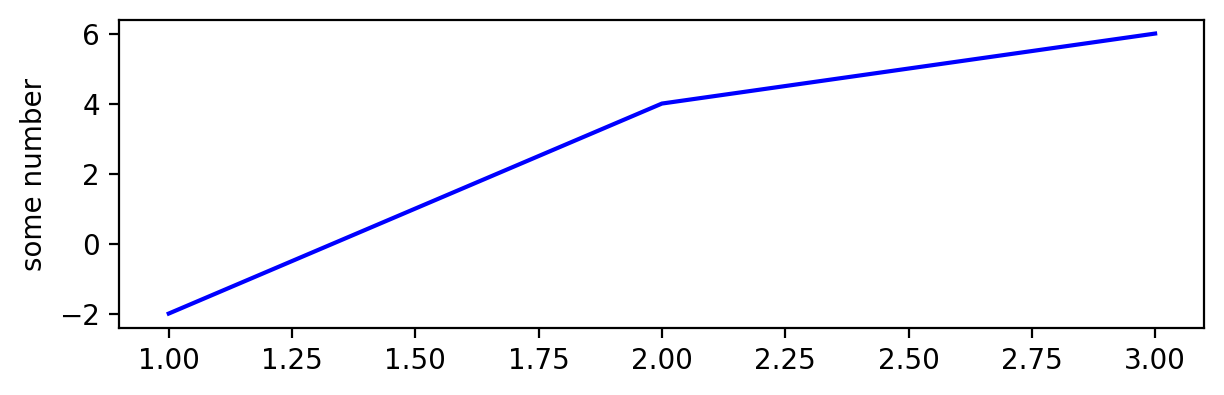

In [13]:
x = [1, 2, 3] # 1) 데이터 준비
y = [-2, 4, 6]
plt.figure(figsize=(7, 2)) # 2) 그래프 객체 생성
plt.plot(x, y, color='b') # 3) 그래프 함수
plt.ylabel('some number') # 4) 커스터마이징
plt.show() # 5) 그래프 화면 출력 cf.plt.savefig('파일명.jpg')

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [17]:
import numpy as np
x = np.arange(0, 10, 0.01)
len(x)

1000

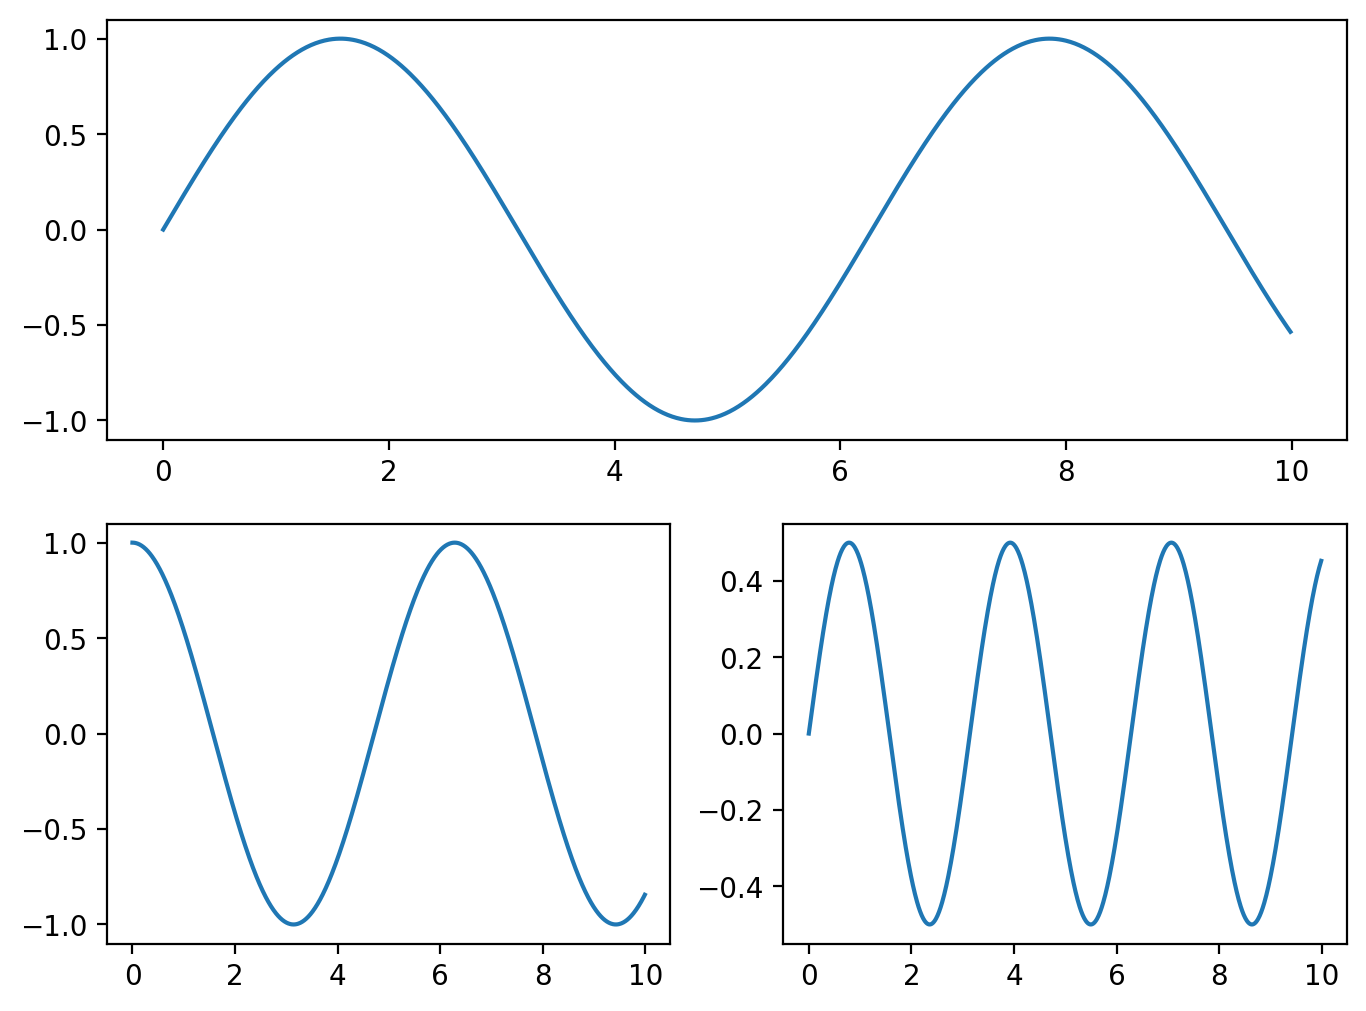

In [24]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(224); plt.plot(x, np.sin(x)*np.cos(x))

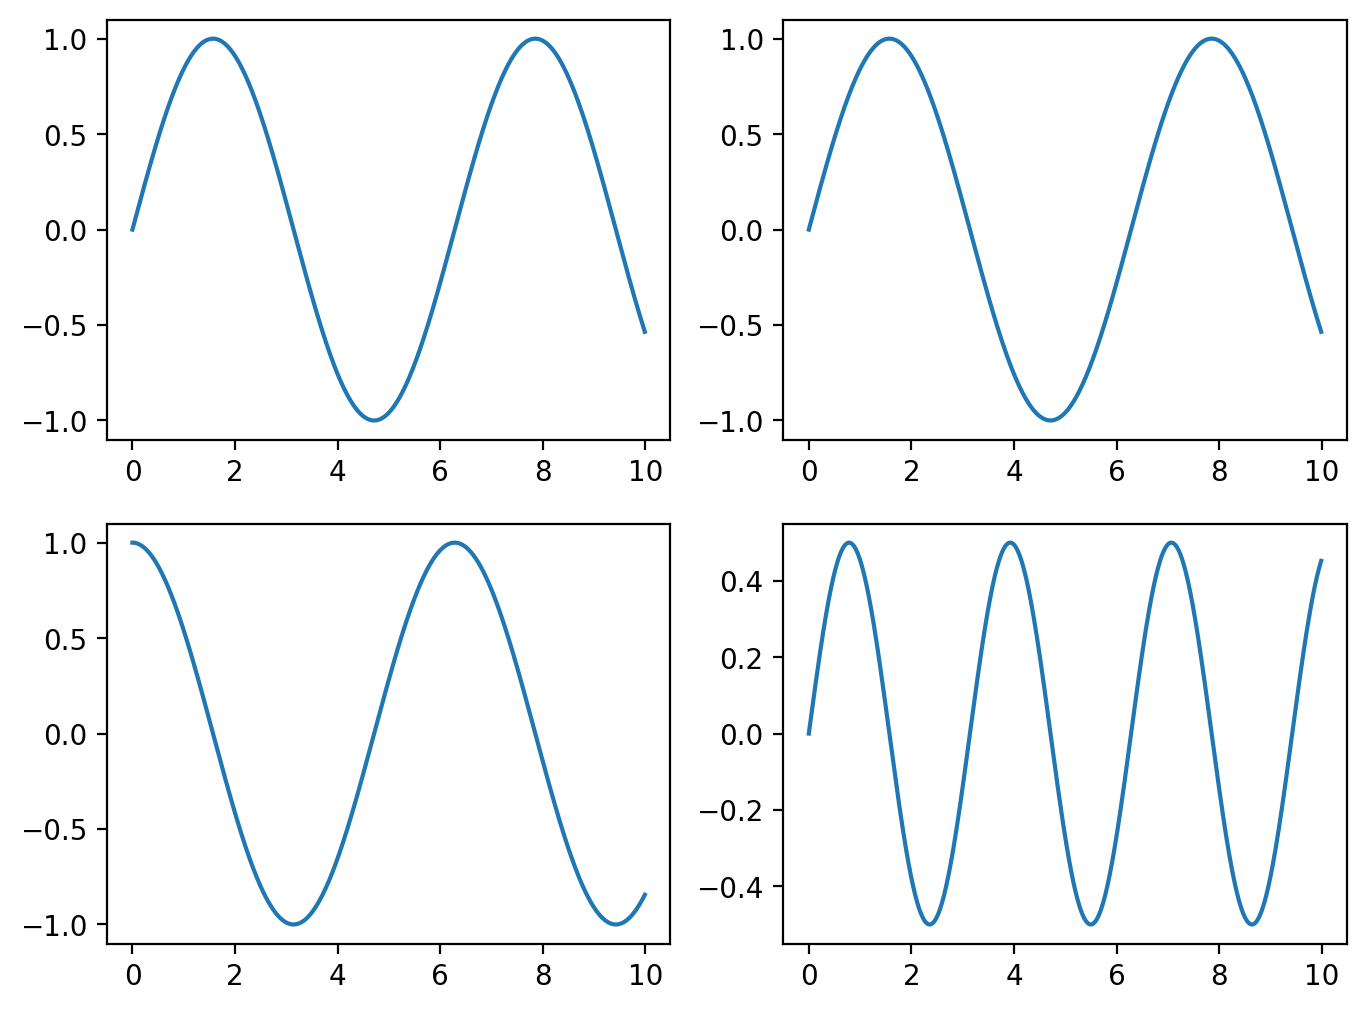

In [25]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplots() 함수로 서브플롯 추가
- 교안(14page) : https://wikidocs.net/92085

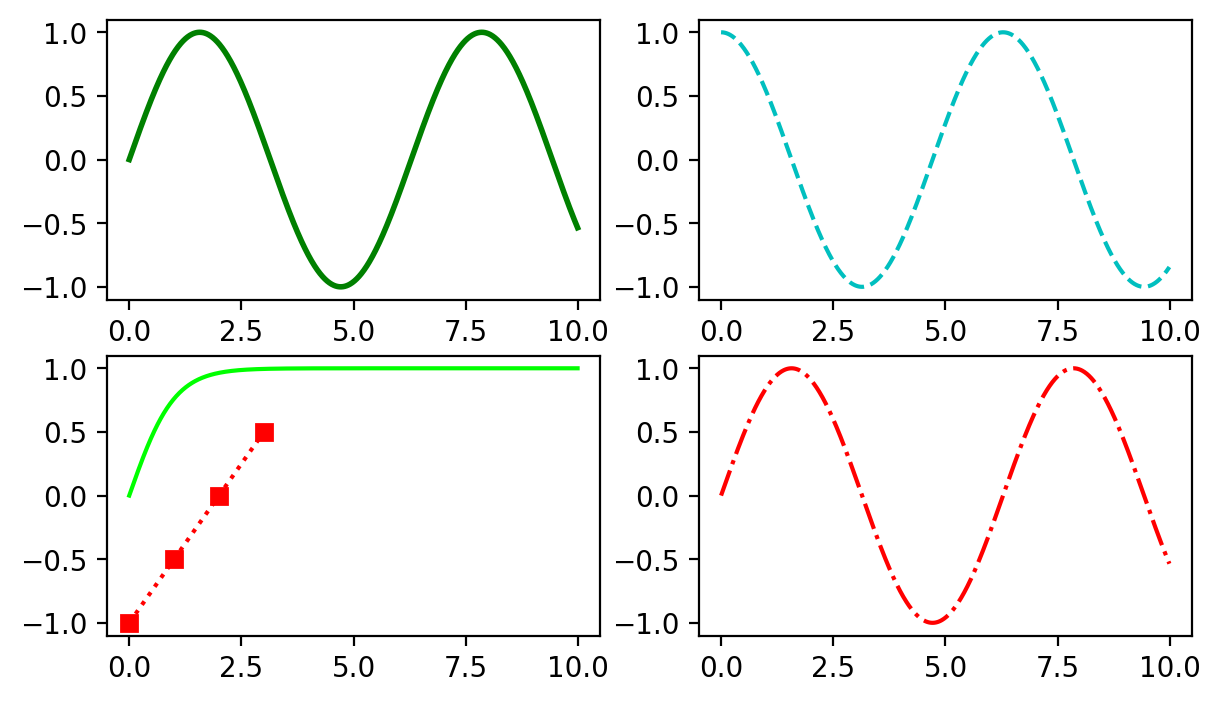

In [47]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 4))
axes[0,0].plot(x, np.sin(x),color='g', linewidth=2)
axes[0,1].plot(x, np.cos(x),'c--') # color='c',linetyle=':','--','-'
axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5], 'rs:') # color='c',marker='o'
axes[1,0].plot(x, np.tanh(x), '#00FF00')
axes[1,1].plot(x, np.sin(x), 'r-.')
plt.show()

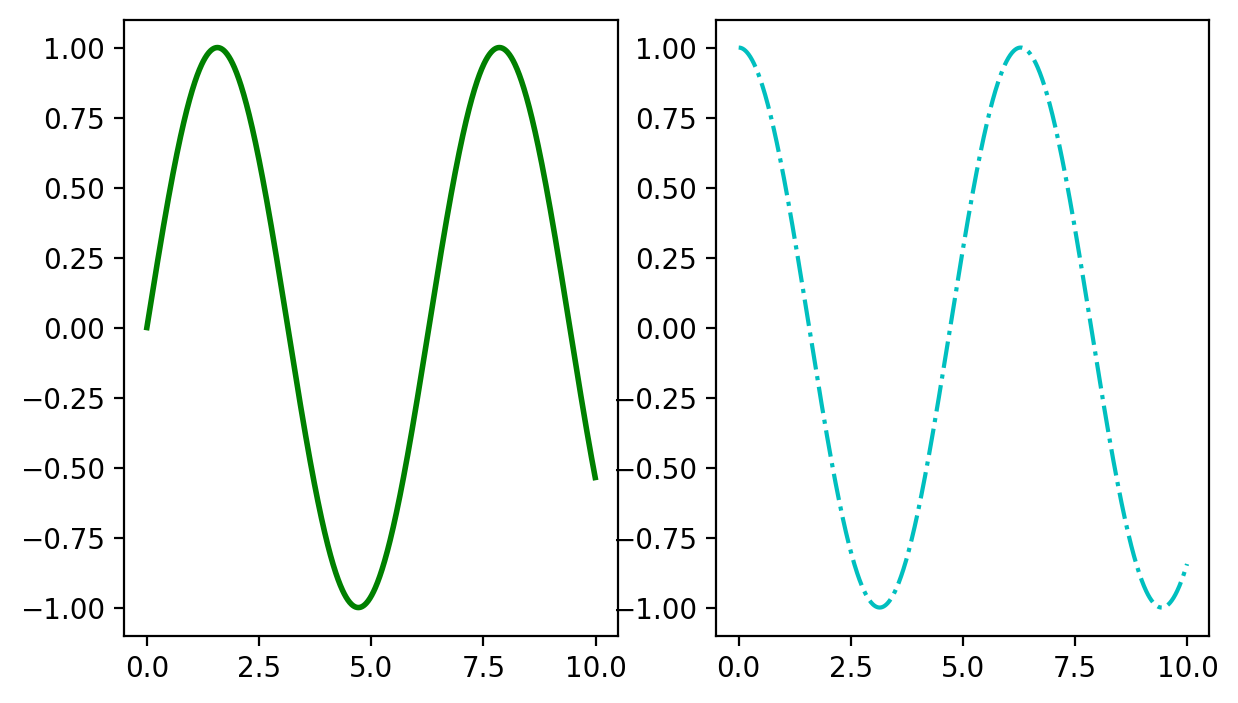

In [50]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(ncols=2, figsize=(7, 4)) # nrows(기본값)
axes[0].plot(x, np.sin(x),color='g', linewidth=2)
axes[1].plot(x, np.cos(x),'c-.') # color='c',linetyle=':','--','-'

### 3) pandas, DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, kind='line', figsize, title, xlim, ylim...)
    * kind : line(기본값), scatter(점도표), bar, barh, box, pie, density...
    * xlim, ylim : list / tuple

In [52]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

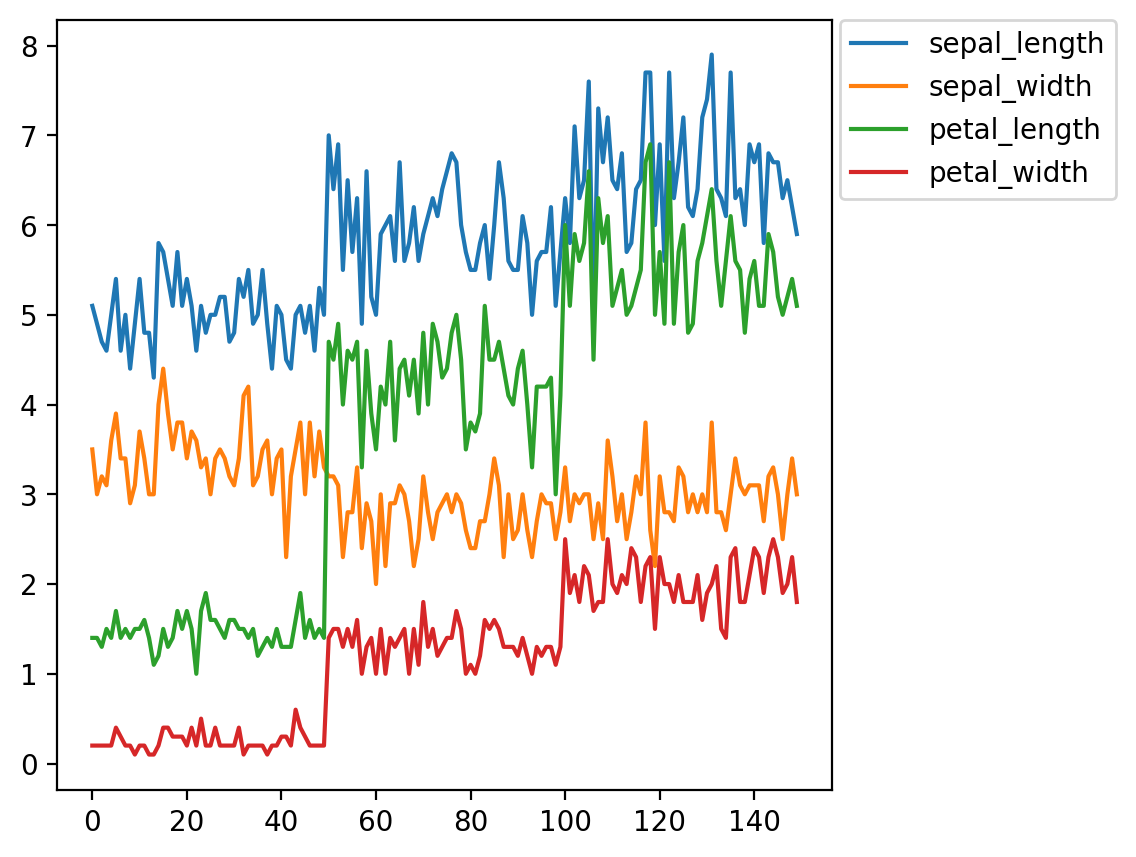

In [71]:
iris.plot(kind='line', figsize=(5, 5))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# plt.savefig('data/ch12_iris.jpg')
plt.show()

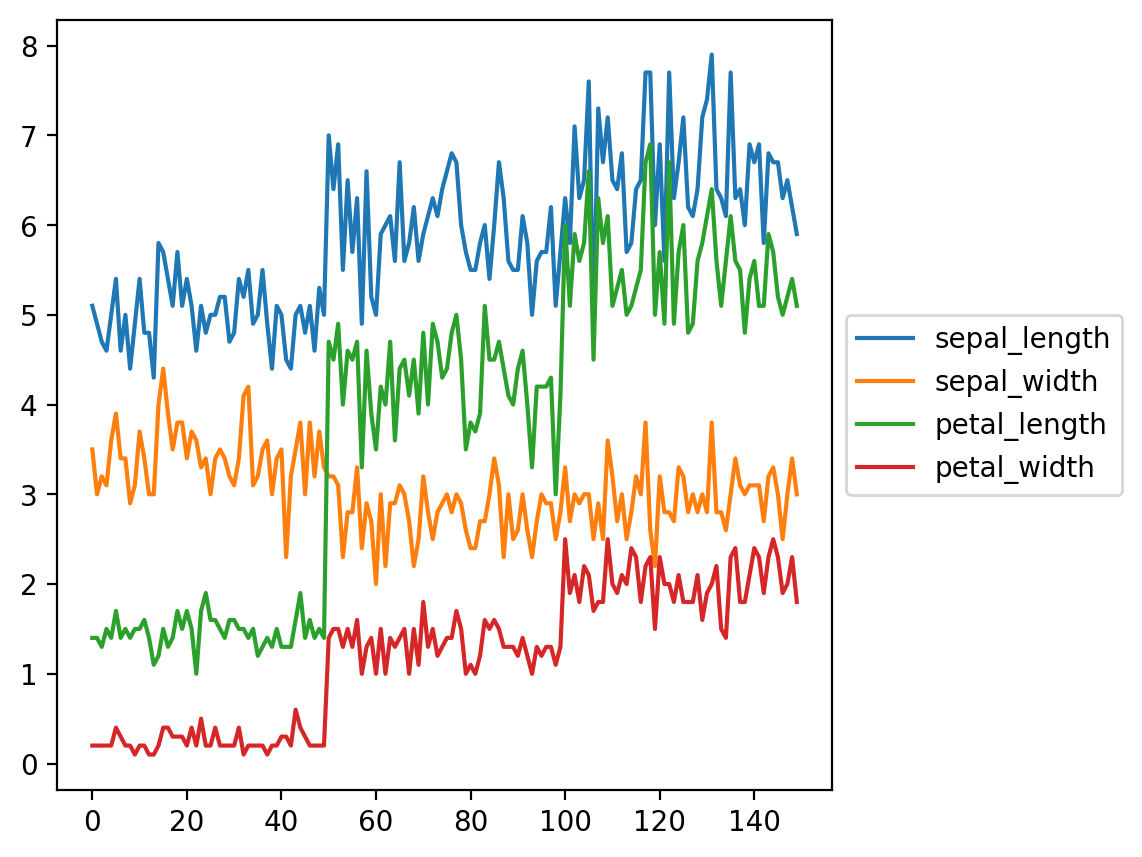

In [64]:
g = iris.plot(kind='line', figsize=(5, 5))
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

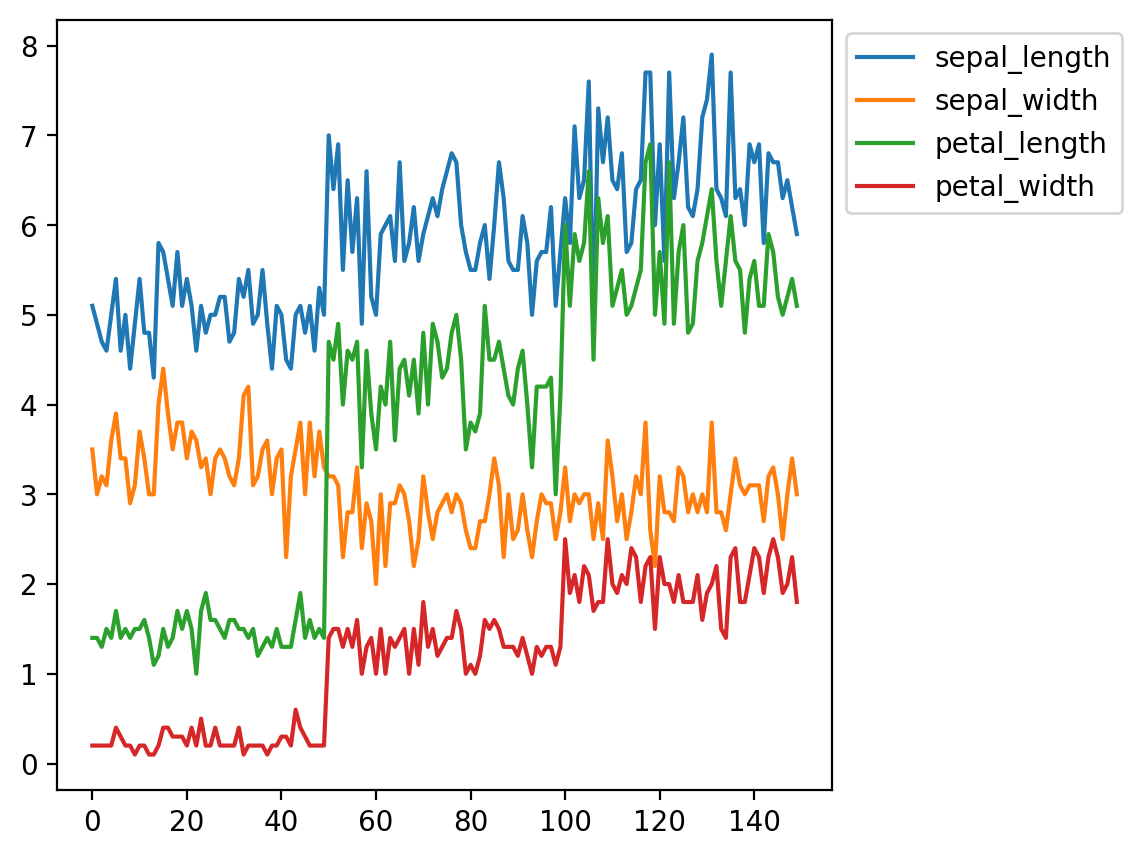

In [65]:
g=iris.plot(kind='line', figsize=(5, 5))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [72]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


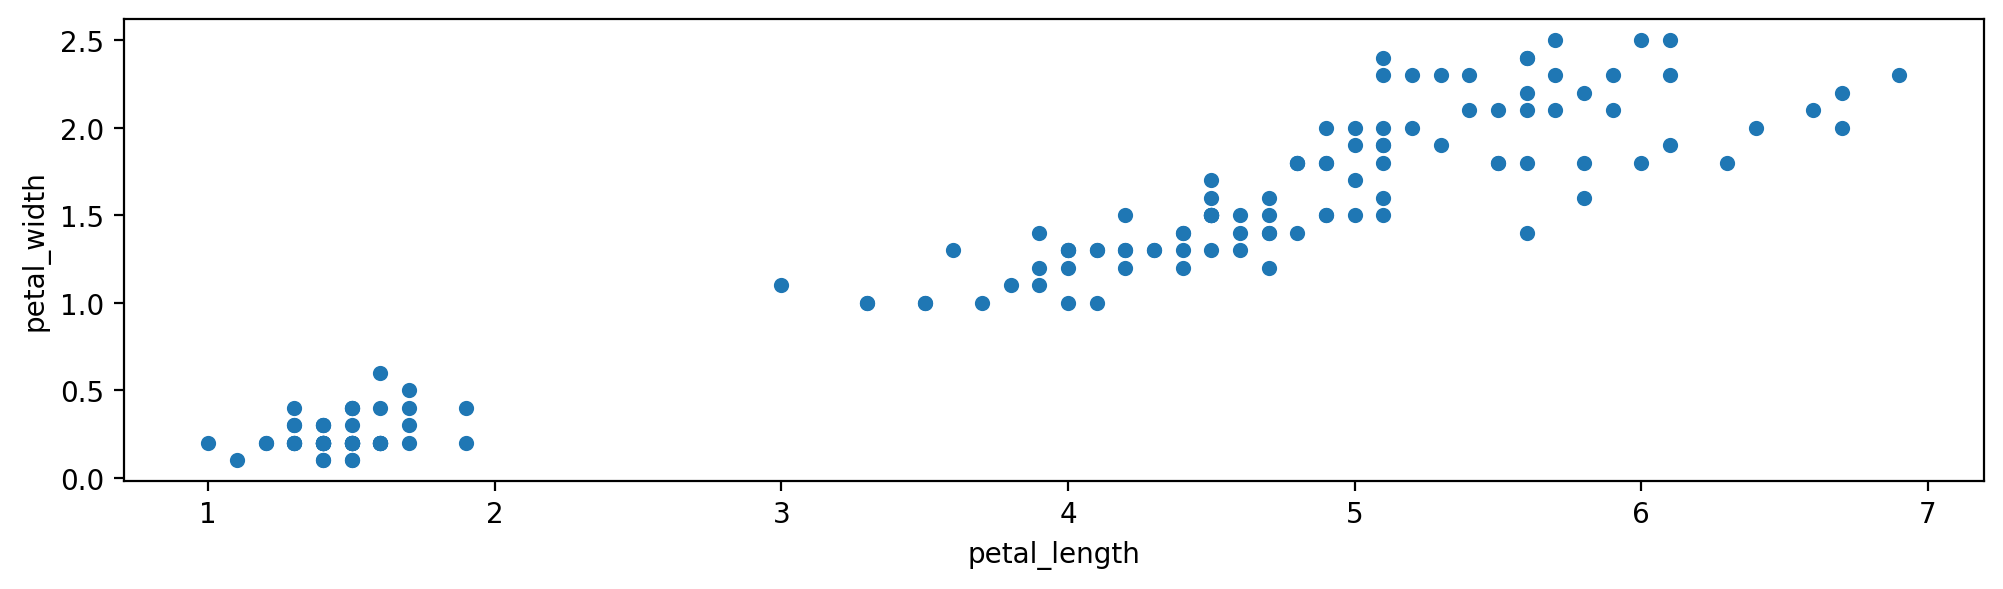

In [73]:
iris.plot(x='petal_length',y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

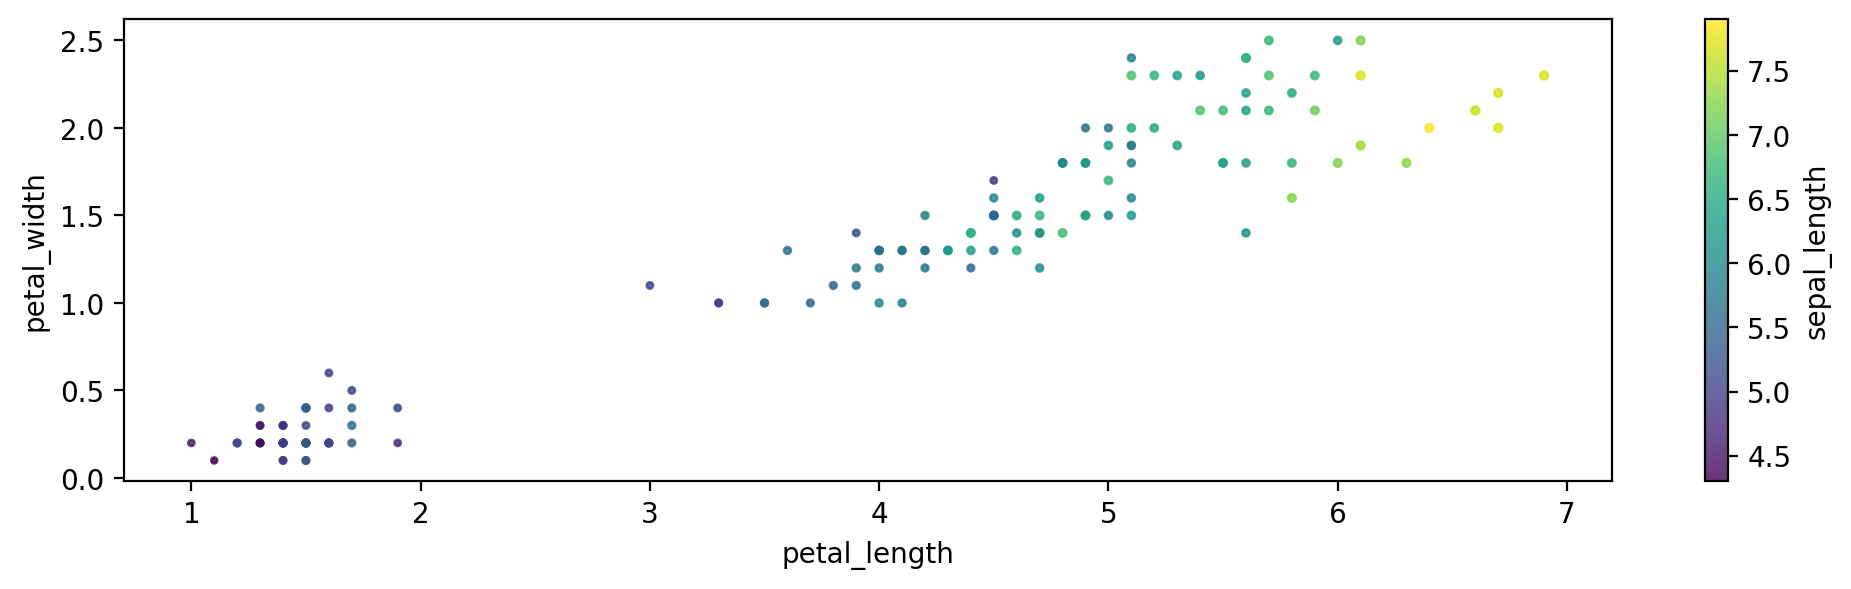

In [75]:
iris.plot(kind='scatter', x='petal_length',
          y='petal_width', 
          figsize=(12,3), 
          s='sepal_length',  # size
          c='sepal_length',  # color
         alpha=.8) # 0<=투명도<=1
plt.show()

<Axes: >

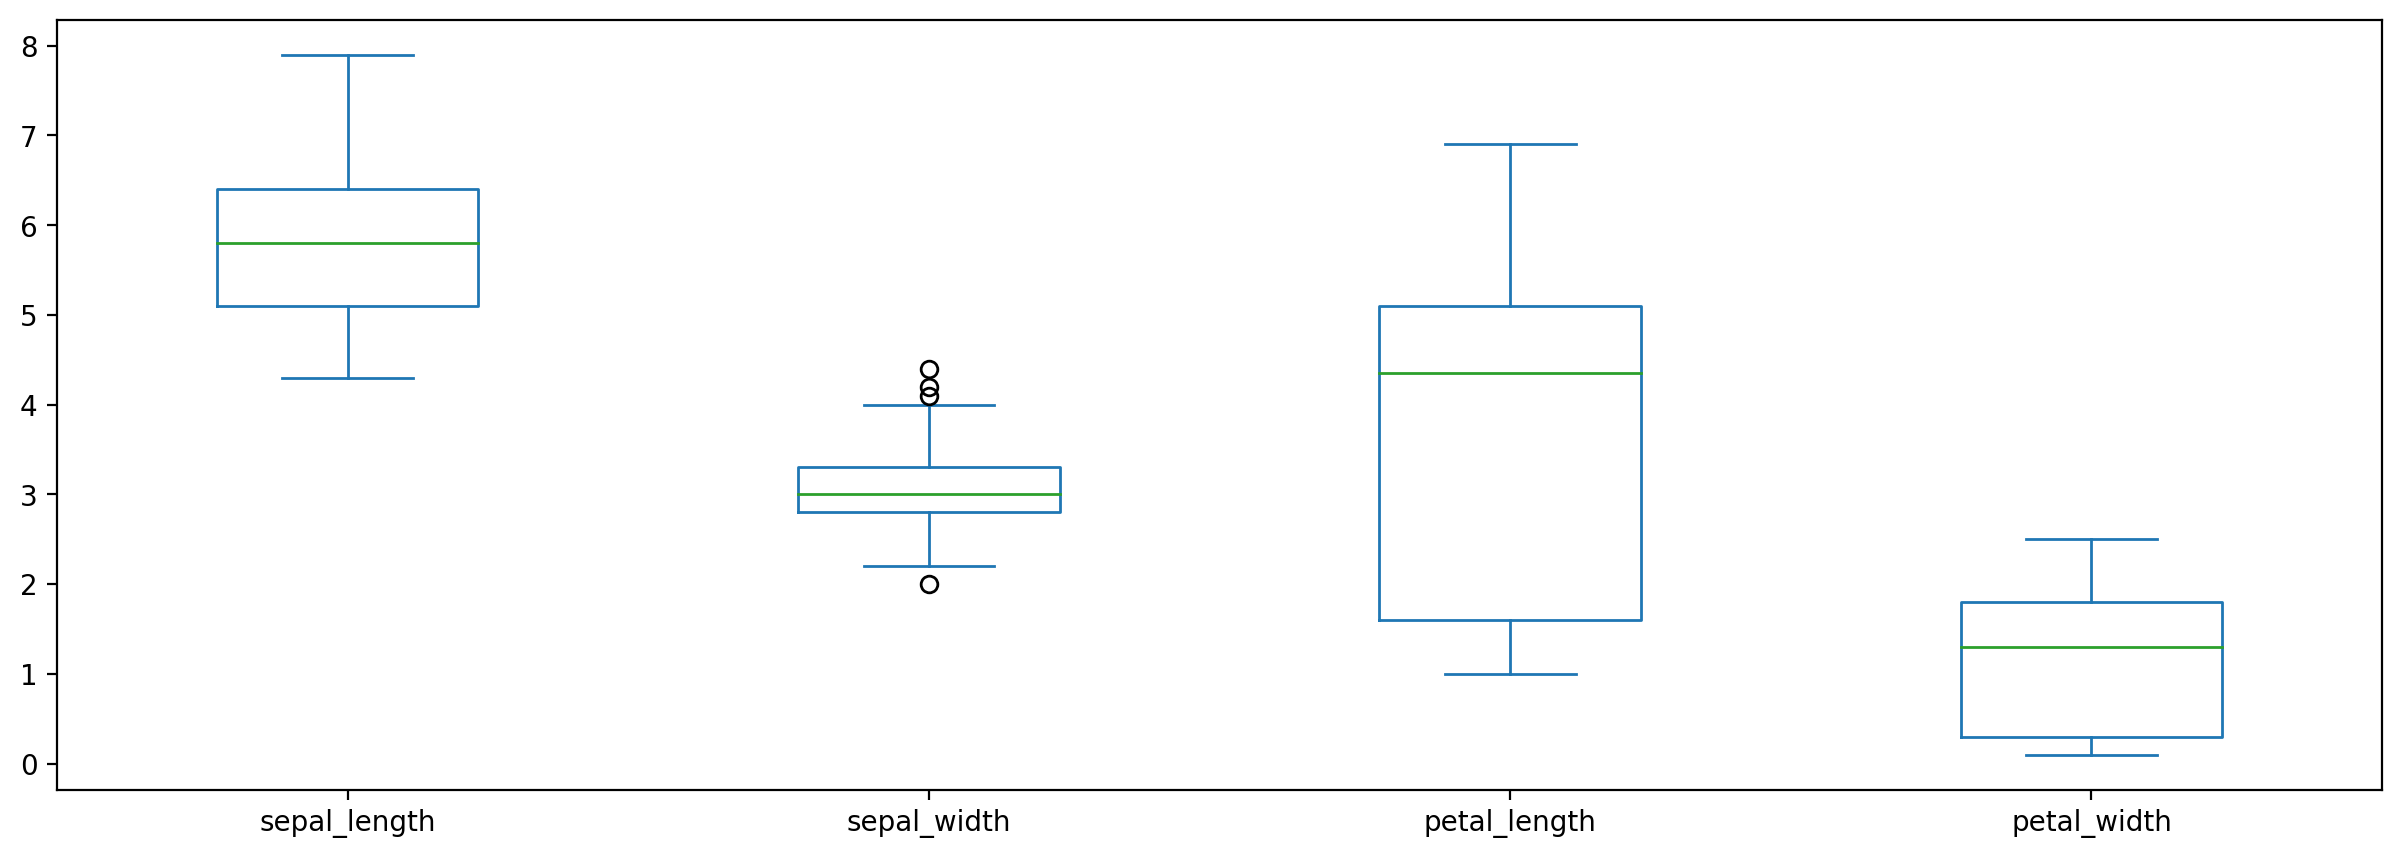

In [80]:
# 모든 열의 boxplot (이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box', figsize=(15,5))

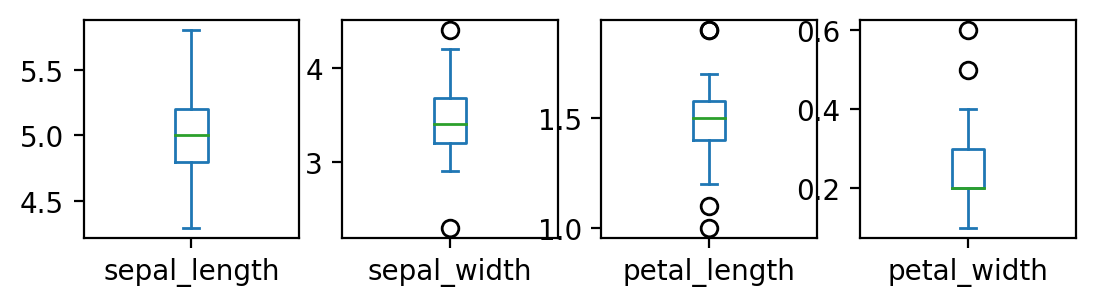

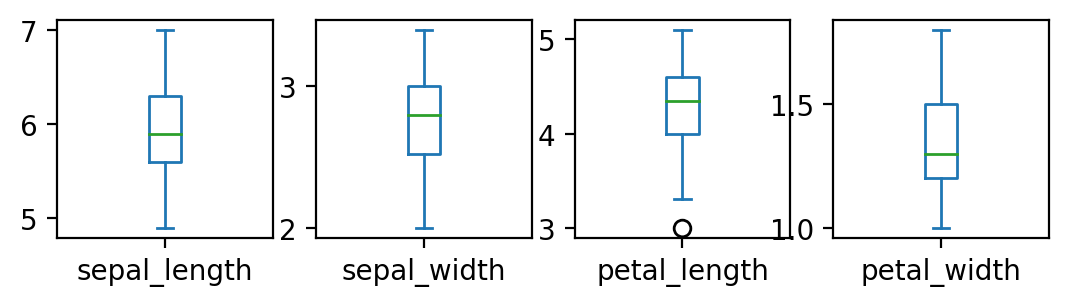

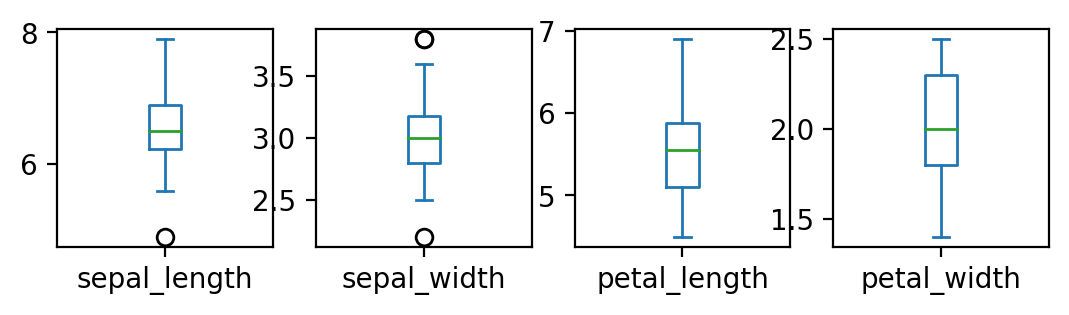

In [87]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True, 
                             layout=(3,4), 
                             sharex=True) # x축공유
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot함수들 : https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html
### 1) plt.scatter() : 산점도

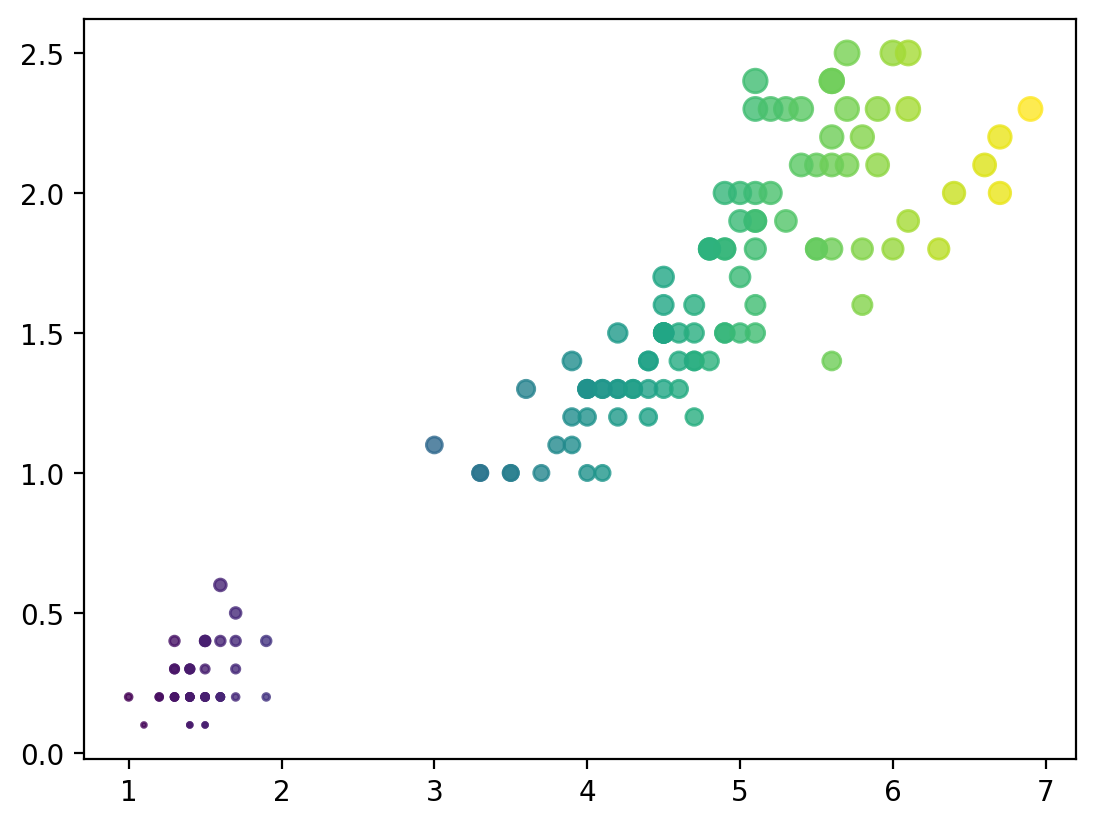

In [131]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.petal_width*30,  # size
           c=iris.petal_length*20, # color
           alpha=.8)

### 2) boxplot(단점:분포를 못함), violonplot()

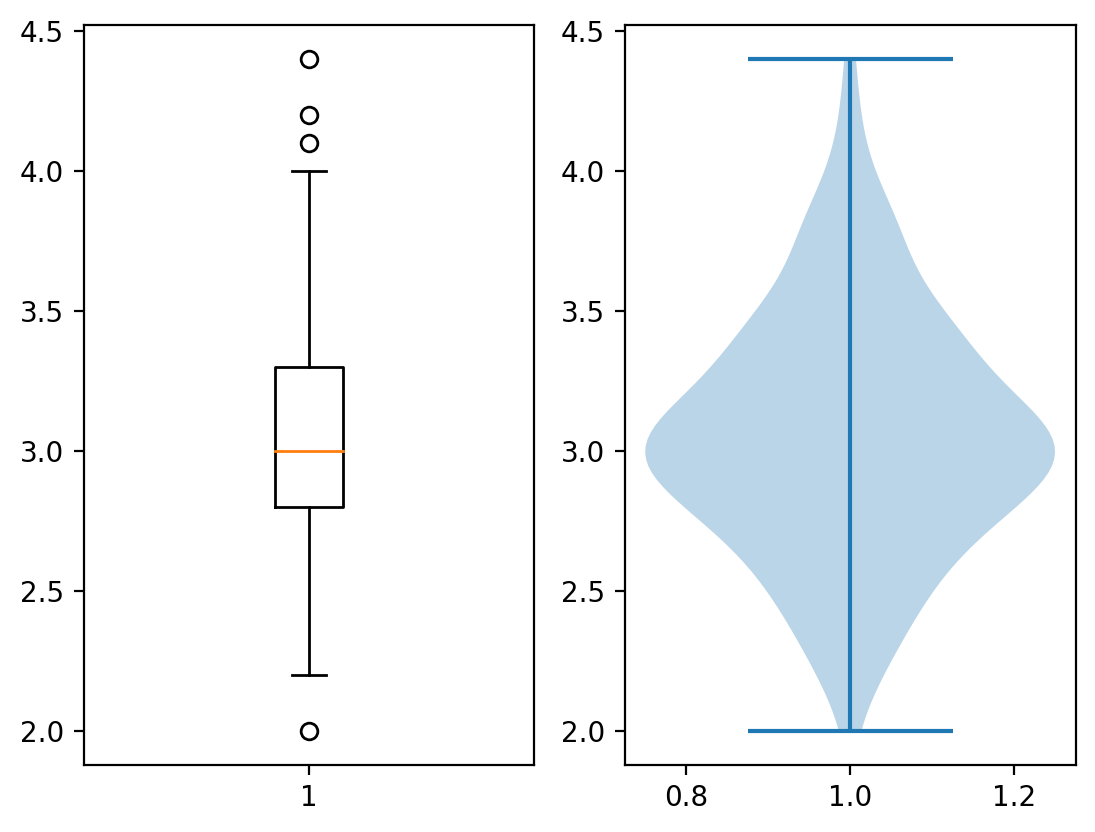

In [117]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3) bar(), barh(), axvline(수직선), axhline(수편선)

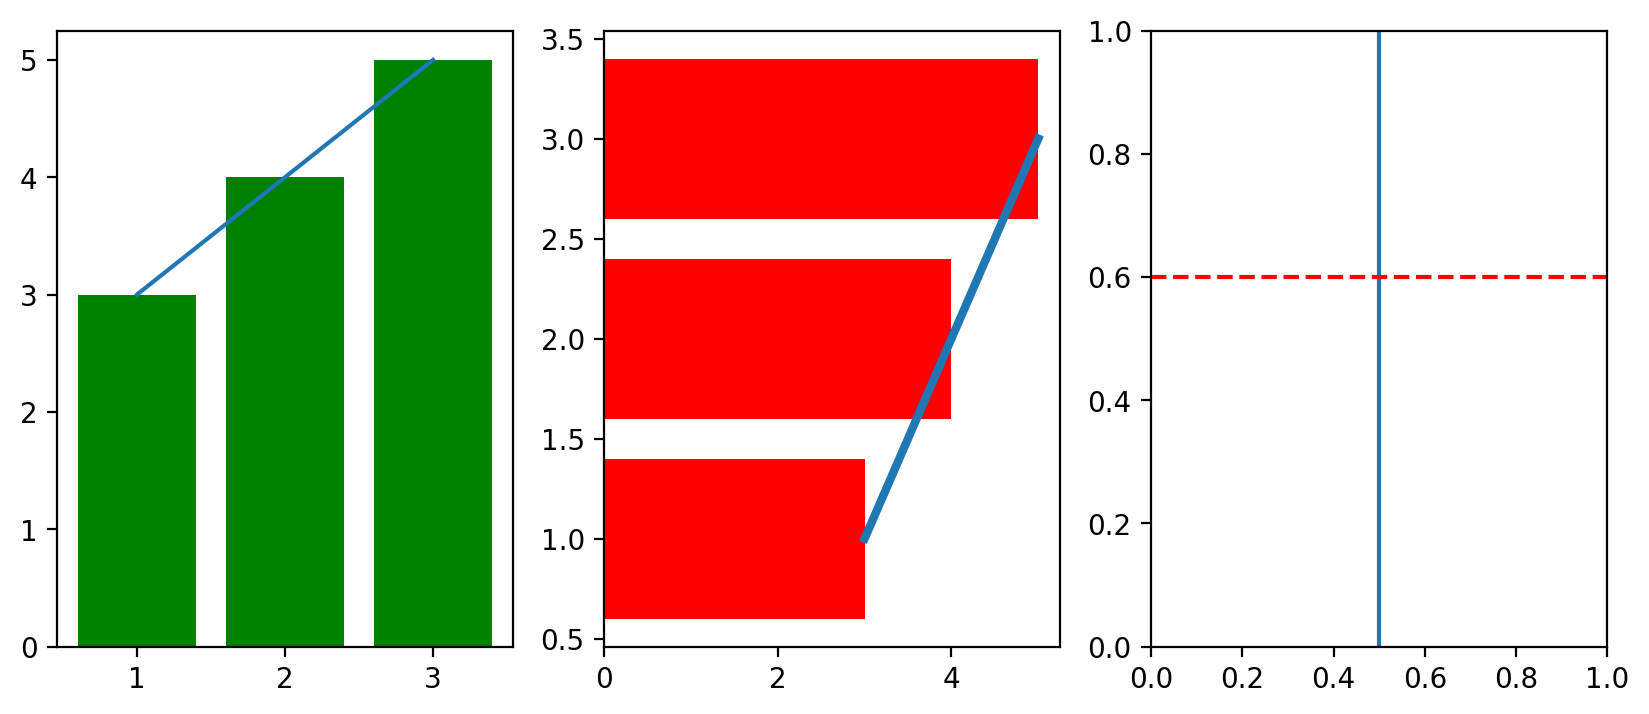

In [106]:
x=[1, 2, 3]
y=[3, 4, 5]
fig, axes = plt.subplots(ncols=3, figsize=(10,4))
axes[0].bar(x, y, color='g')
axes[0].plot(x,y)
axes[1].barh(x, y, color='r')
axes[1].plot(y,x,  linewidth=3)
axes[2].axvline(0.5)
axes[2].axhline(0.6, c='r', linestyle='--')

### 4) hist(도수분포표;histogram)

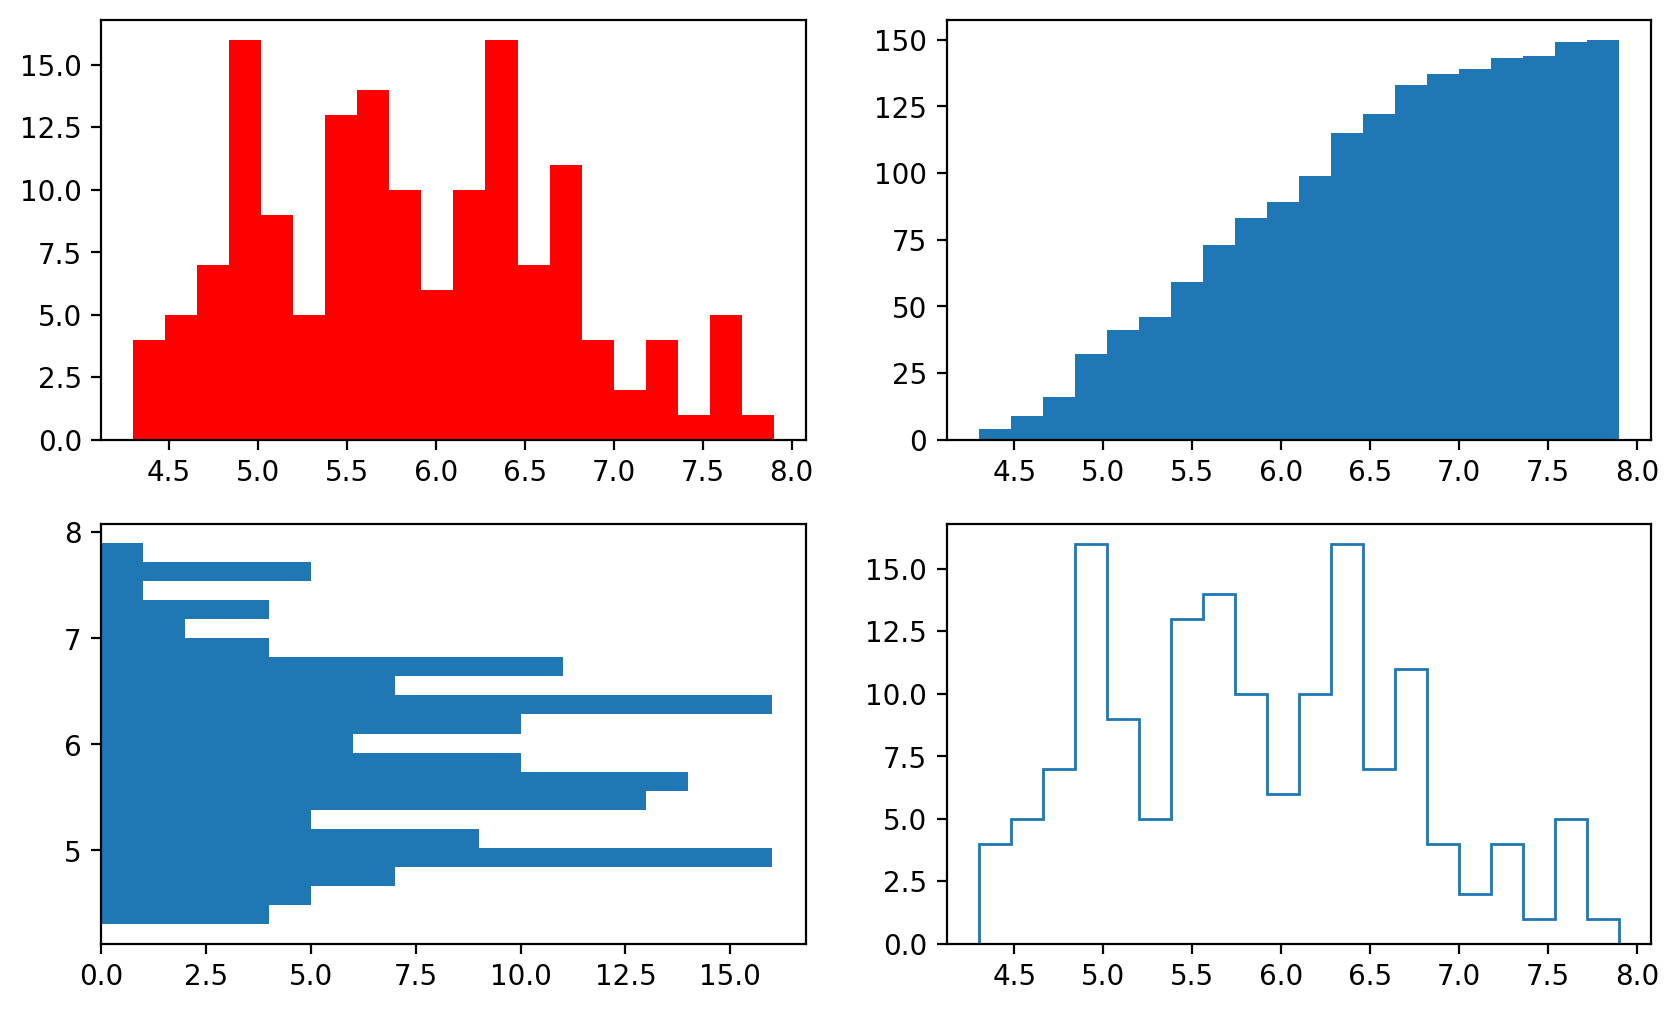

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 히스토그램(도수분포표)
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
plt.show()

## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker...(plot의 매개변수로 지정)
### 2) text(), annotate()

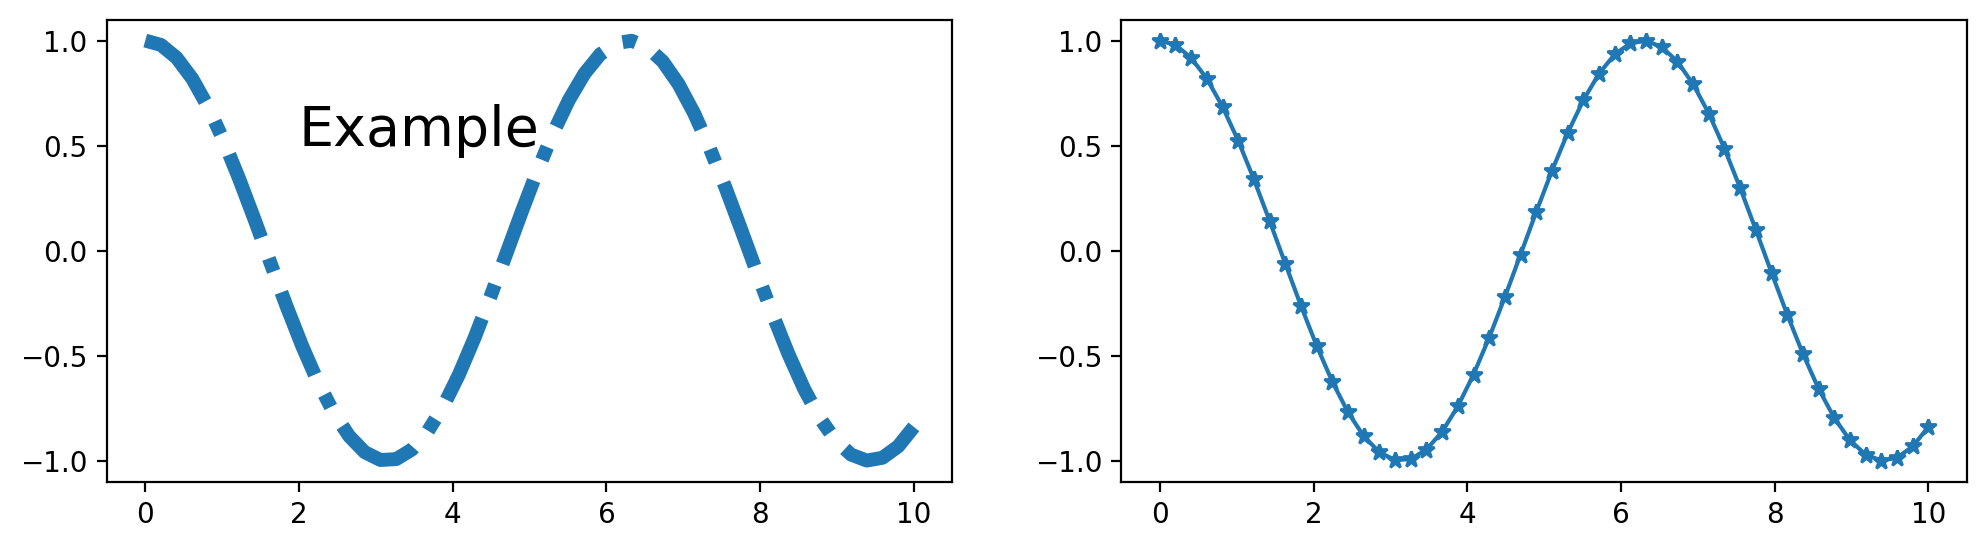

In [130]:
x = np.linspace(0, 10) #num=50 기본값
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(x,y, linewidth=5, linestyle='-.')
axes[0].text(2, 0.5, 'Example', fontsize=20)
axes[1].plot(x,y, marker='*')
plt.show()